In [2]:
import networkx as nx
import numpy as np
import copy
import random
import time

#Plotting
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [40]:
g=nx.Graph()
#g.add_edges_from([(1,2),(1,3),(4,5)])#[(1,2),(2,4),(1,3),(3,4),(4,5)])
g.add_edge(1,2,r=1.0)
g.add_edge(1,3,r=1.0)
g.add_edge(2,4,r=1.0)
g.add_edge(3,4,r=1.0)
g.add_edge(4,5,r=1.0)

g.edges(data='True')

[(1, 2, None), (1, 3, None), (2, 4, None), (3, 4, None), (4, 5, None)]

In [3]:
g=nx.Graph()

g.add_edge(1,2,r=1.0)
g.add_edge(1,3,r=1.0)
g.add_edge(2,4,r=1.0)
g.add_edge(3,4,r=1.0)
g.add_edge(4,5,r=1.0)

g.edges(data=True)

[(1, 2, {'r': 1.0}),
 (1, 3, {'r': 1.0}),
 (2, 4, {'r': 1.0}),
 (3, 4, {'r': 1.0}),
 (4, 5, {'r': 1.0})]

In [7]:
print nx.edge_current_flow_betweenness_centrality_subset(g,[1],[2],normalized=False)

print nx.current_flow_betweenness_centrality_subset(g,[1],[2],normalized=False,weight='r')

{(4, 5): 0.0, (1, 2): 0.1875, (1, 3): 0.0625, (3, 4): 0.0625, (2, 4): 0.0625}
{1: -0.083333333333333315, 2: -0.083333333333333315, 3: -0.20833333333333331, 4: -0.20833333333333331, 5: -0.33333333333333331}


In [62]:
print nx.edge_current_flow_betweenness_centrality(g,normalized=True)

print nx.current_flow_betweenness_centrality(g,normalized=True)

{(4, 5): 0.3333333333333333, (1, 2): 0.2916666666666667, (1, 3): 0.2916666666666667, (3, 4): 0.3333333333333333, (2, 4): 0.3333333333333333}
{1: 0.25, 2: 0.2916666666666667, 3: 0.2916666666666667, 4: 0.6666666666666666, 5: 0.0}


In [3]:
L=nx.laplacian_matrix(g,weight='r')
l=L.todense()
n=g.number_of_nodes()
print l,n
l=np.delete(l,0,axis=0)
l=np.delete(l,0,axis=1)
print l
v=np.linalg.inv(l)
print v
t=np.zeros((n,n))
t[1:,1:]=v
print t

T=dict.fromkeys(g.nodes(),{})
i_count=0
for i in T:
    T[i]=dict.fromkeys(g.nodes(),0.0)
    j_count=0
    for j in T[i]:
        T[i][j]=t[i_count][j_count]
        j_count+=1
    i_count+=1
    
print T
    


[[ 2. -1. -1.  0.  0.]
 [-1.  2.  0. -1.  0.]
 [-1.  0.  2. -1.  0.]
 [ 0. -1. -1.  3. -1.]
 [ 0.  0.  0. -1.  1.]] 5
[[ 2.  0. -1.  0.]
 [ 0.  2. -1.  0.]
 [-1. -1.  3. -1.]
 [ 0.  0. -1.  1.]]
[[ 0.75  0.25  0.5   0.5 ]
 [ 0.25  0.75  0.5   0.5 ]
 [ 0.5   0.5   1.    1.  ]
 [ 0.5   0.5   1.    2.  ]]
[[ 0.    0.    0.    0.    0.  ]
 [ 0.    0.75  0.25  0.5   0.5 ]
 [ 0.    0.25  0.75  0.5   0.5 ]
 [ 0.    0.5   0.5   1.    1.  ]
 [ 0.    0.5   0.5   1.    2.  ]]
{1: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}, 2: {1: 0.0, 2: 0.75, 3: 0.25, 4: 0.5, 5: 0.5}, 3: {1: 0.0, 2: 0.25, 3: 0.75, 4: 0.5, 5: 0.5}, 4: {1: 0.0, 2: 0.5, 3: 0.5, 4: 1.0, 5: 1.0}, 5: {1: 0.0, 2: 0.5, 3: 0.5, 4: 1.0, 5: 2.0}}


In [4]:
seen=[]

V=dict.fromkeys(g.nodes(),{})
print V

for s in V:
    #V[s]=dict.fromkeys(list(set(g.nodes())-set(seen)),{})
    V[s]=dict.fromkeys(g.nodes(),{})
    seen.append(s)
    for t in V[s]:
        V[s][t]=dict.fromkeys(g.nodes(),{})
        for i in g.nodes():
            V[s][t][i]=T[i][s]-T[i][t]
    
for s in V:
    for t in V[s]:
        print s,t,V[s][t]

{1: {}, 2: {}, 3: {}, 4: {}, 5: {}}
1 1 {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
1 2 {1: 0.0, 2: -0.75, 3: -0.25, 4: -0.5, 5: -0.5}
1 3 {1: 0.0, 2: -0.25, 3: -0.75, 4: -0.5, 5: -0.5}
1 4 {1: 0.0, 2: -0.5, 3: -0.5, 4: -1.0, 5: -1.0}
1 5 {1: 0.0, 2: -0.5, 3: -0.5, 4: -1.0, 5: -2.0}
2 1 {1: 0.0, 2: 0.75, 3: 0.25, 4: 0.5, 5: 0.5}
2 2 {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
2 3 {1: 0.0, 2: 0.5, 3: -0.5, 4: 0.0, 5: 0.0}
2 4 {1: 0.0, 2: 0.25, 3: -0.25, 4: -0.5, 5: -0.5}
2 5 {1: 0.0, 2: 0.25, 3: -0.25, 4: -0.5, 5: -1.5}
3 1 {1: 0.0, 2: 0.25, 3: 0.75, 4: 0.5, 5: 0.5}
3 2 {1: 0.0, 2: -0.5, 3: 0.5, 4: 0.0, 5: 0.0}
3 3 {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
3 4 {1: 0.0, 2: -0.25, 3: 0.25, 4: -0.5, 5: -0.5}
3 5 {1: 0.0, 2: -0.25, 3: 0.25, 4: -0.5, 5: -1.5}
4 1 {1: 0.0, 2: 0.5, 3: 0.5, 4: 1.0, 5: 1.0}
4 2 {1: 0.0, 2: -0.25, 3: 0.25, 4: 0.5, 5: 0.5}
4 3 {1: 0.0, 2: 0.25, 3: -0.25, 4: 0.5, 5: 0.5}
4 4 {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
4 5 {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: -1.0}
5 1 {1: 0.0

In [65]:
keys=g.nodes()
keys.extend(g.edges())

I=dict.fromkeys(g.nodes(),{})
print I

for s in V:
    I[s]=dict.fromkeys(V[s],{})
    for t in V[s]:
        I[s][t]=dict.fromkeys(keys,{})
        for i in g.nodes():
            I[s][t][i]=0.0    
            if i==t or i==s:
                I[s][t][i]=1.0
            else:
                I[s][t][i]=0.0
                for j in g.neighbors(i):
                    I[s][t][i]+=.5*abs(T[i][s]-T[i][t]-T[j][s]+T[j][t])
        
        for e in g.edges():
            I[s][t][e]=abs(T[e[0]][s]-T[e[0]][t]-T[e[1]][s]+T[e[1]][t])
            
                
                
for s in I:
    for t in I[s]:
        print s,t,I[s][t]

{1: {}, 2: {}, 3: {}, 4: {}, 5: {}}
1 1 {(1, 2): 0.0, 1: 1.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, (4, 5): 0.0, (1, 3): 0.0, (3, 4): 0.0, (2, 4): 0.0}
1 2 {(1, 2): 0.75, 1: 1.0, 2: 1.0, 3: 0.25, 4: 0.25, 5: 0.0, (4, 5): 0.0, (1, 3): 0.25, (3, 4): 0.25, (2, 4): 0.25}
1 3 {(1, 2): 0.25, 1: 1.0, 2: 0.25, 3: 1.0, 4: 0.25, 5: 0.0, (4, 5): 0.0, (1, 3): 0.75, (3, 4): 0.25, (2, 4): 0.25}
1 4 {(1, 2): 0.5, 1: 1.0, 2: 0.5, 3: 0.5, 4: 1.0, 5: 0.0, (4, 5): 0.0, (1, 3): 0.5, (3, 4): 0.5, (2, 4): 0.5}
1 5 {(1, 2): 0.5, 1: 1.0, 2: 0.5, 3: 0.5, 4: 1.0, 5: 1.0, (4, 5): 1.0, (1, 3): 0.5, (3, 4): 0.5, (2, 4): 0.5}
2 1 {(1, 2): 0.75, 1: 1.0, 2: 1.0, 3: 0.25, 4: 0.25, 5: 0.0, (4, 5): 0.0, (1, 3): 0.25, (3, 4): 0.25, (2, 4): 0.25}
2 2 {(1, 2): 0.0, 1: 0.0, 2: 1.0, 3: 0.0, 4: 0.0, 5: 0.0, (4, 5): 0.0, (1, 3): 0.0, (3, 4): 0.0, (2, 4): 0.0}
2 3 {(1, 2): 0.5, 1: 0.5, 2: 1.0, 3: 1.0, 4: 0.5, 5: 0.0, (4, 5): 0.0, (1, 3): 0.5, (3, 4): 0.5, (2, 4): 0.5}
2 4 {(1, 2): 0.25, 1: 0.25, 2: 1.0, 3: 0.25, 4: 1.0, 5: 0.0, (4, 5

In [10]:
#src={1:.5,3:.5}
#snk={3:.1,5:.3,4:0.6}

src={1:1.0}
snk={2:1.0}

I=make_current_dict(g)
elements=g.nodes()
p_r=dict.fromkeys(g.nodes()+g.edges(),0.0)
#p_r=dict.fromkeys(g.nodes(),0.0)
#print p_r

for s,belief_s in src.iteritems():
    for t,belief_t in snk.iteritems():
        for n in p_r:
            #print s,t,n
            p_n=belief_s*belief_t*I[s][t][n]
            #print p_n
            p_r[n]+=p_n
            
print p_r

{(1, 2): 0.75, 1: 1.0, 2: 1.0, 3: 0.25, 4: 0.25, 5: 0.0, (4, 5): 0.0, (1, 3): 0.25, (3, 4): 0.25, (2, 4): 0.25}


In [33]:
g.nodes()

[1, 2, 3, 4, 5]

In [9]:
def make_current_dict(g_original):
    
    #Create resitance graph
    g=nx.Graph()
    for i,j in g_original.edges():
        g.add_edge(i, j, r=1.0)
    
    #Laplacian
    L=nx.laplacian_matrix(g,weight='r')
    l=L.todense()
    n=g.number_of_nodes()
#     print l,n
    
    #Delete ground
    l=np.delete(l,0,axis=0)
    l=np.delete(l,0,axis=1)
#     print l
    
    #Solve voltage
    v=np.linalg.inv(l)
#     print v
    
    #Add ground
    t=np.zeros((n,n))
    t[1:,1:]=v
#     print t

    #Make voltage dictionary
    T=dict.fromkeys(g.nodes(),{})
    i_count=0
    for i in T:
        T[i]=dict.fromkeys(g.nodes(),0.0)
        j_count=0
        for j in T[i]:
            T[i][j]=t[i_count][j_count]
            j_count+=1
        i_count+=1
        
    seen=[]

    V=dict.fromkeys(g.nodes(),{})
#     print V

    for s in V:
        #V[s]=dict.fromkeys(list(set(g.nodes())-set(seen)),{})
        V[s]=dict.fromkeys(g.nodes(),{})
        seen.append(s)
        for t in V[s]:
            V[s][t]=dict.fromkeys(g.nodes(),{})
            for i in g.nodes():
                            V[s][t][i]=T[i][s]-T[i][t]
    
#     for s in V:
#         for t in V[s]:
#             print s,t,V[s][t]

    #Make current dictionary
    keys=g.nodes()
    keys.extend(g.edges())

    I=dict.fromkeys(g.nodes(),{})
#     print I
    
#     print V

    for s in V:
        I[s]=dict.fromkeys(V[s],{})
        for t in V[s]:
            I[s][t]=dict.fromkeys(keys,{})
            for i in g.nodes():
                I[s][t][i]=0.0    
                if i==t or i==s:
                    I[s][t][i]=1.0
                else:
                    I[s][t][i]=0.0
                    for j in g.neighbors(i):
#                         print s,t,i,j
                        I[s][t][i]+=.5*abs(T[i][s]-T[i][t]-T[j][s]+T[j][t])

            for e in g.edges():
                I[s][t][e]=abs(T[e[0]][s]-T[e[0]][t]-T[e[1]][s]+T[e[1]][t])
    
    return I
           
            

In [5]:
def current_distribution(la,I,g):
    """
    Creates the current distribution through space for
    each edge in a logical architecture
    la structure: {sys:logical network}
    logical network structure = {nodes: location distribution, edges: properties}
    In: la = logical architecture {sys:logical network}
    I = current flow dictionary
    Out: la_I = logical architecture with current information on edges
    """
    la_I=copy.deepcopy(la) #copy original LA
    
    p_r=dict.fromkeys(g.nodes()+g.edges(), 0.0) #probability dictionary
    #print p_r
    
    for sys,l_net in la.iteritems():
#         print sys
        for i,j in l_net.edges(): #get edges within logical architecture
#             print ' ',i,j
            i_locs=l_net.node[i]['loc']
            j_locs=l_net.node[j]['loc']
#             print i_locs,j_locs
            
            p_r=dict.fromkeys(g.nodes()+g.edges(), 0.0) #probability dictionary
            
            for i_loc,belief_i in i_locs.iteritems():
                for j_loc,belief_j in j_locs.iteritems():
                    for ele in p_r:
#                         print i_loc,j_loc,ele
                        
                        #check if element is formatted
                        if ele in I[i_loc][j_loc]:
                            #print ele
                            switch=False
                        elif ele[::-1] in I[i_loc][j_loc]:
                            #print 'switch',(ele[1],ele[0])
                            switch=True
                            ele=ele[::-1]
                            
                        p_ele=belief_i*belief_j*I[i_loc][j_loc][ele]
                        #print p_n
                        if not switch:
                            p_r[ele]+=p_ele
                        elif switch:
                            p_r[ele[::-1]]+=p_ele
            
            la_I[sys][i][j]=p_r
            
    
    return la_I
 

In [6]:
def project_current_distribution(LA_I,g):
    """
    Projects the current distributions on the logical architecture to the physical architecture
    In:
    LA_I = logical architecture with current distribution on edges, {sys:logical network: nodes+edges:prob occupied}
    g = physical architecture
    
    Out:
    g_current = physical architecture network with probability of occupancy, 
        g_current[ele]={('sys1'):p_sys1, ('sys2'):p_sys2}
    """
    g_comp=g.copy() #Track complementary probability P(not sys)
    
    for sys,l_net in LA_I.iteritems():
        #print sys
        #create initial complementary node and edge values
        nx.set_node_attributes(g_comp,sys,1.0)
        nx.set_edge_attributes(g_comp,sys,1.0)
        
        for i,j,d in l_net.edges(data=True): #get edges within logical architecture
            #d={node,edge: prob occupied}
            for n in g_comp.nodes():
                g_comp.node[n][sys]*=(1.0-d[n])
                
            for ni,nj in g_comp.edges():
                #print (ni,nj), d[(ni,nj)]
                #print g_comp.edge[ni][nj][sys]
                if (ni,nj) not in d:
                    g_comp[ni][nj][sys]*=(1.0-d[(nj,ni)]) #multiply by compliment
                else:
                    g_comp[ni][nj][sys]*=(1.0-d[(ni,nj)]) #multiply by compliment
        
        #for n,d in g_comp.nodes(data=True):
            #print n,d 
            
        #for e1,e2,d in g_comp.edges(data=True):
            #print (e1,e2),d 
        
    g_current=g_comp.copy() #Get current flow: 1-Pc
    
    
    for sys in LA_I:
        for n in g_current.nodes():
            g_current.node[n][sys]=1.0-g_comp.node[n][sys]
        for i,j in g_current.edges():
            g_current[i][j][sys]=1.0-g_comp.edge[i][j][sys]
    
            
    """
    for n,d in g_current.nodes(data=True):
        print n,d 

    for e1,e2,d in g_current.edges(data=True):
        print (e1,e2),d
    """
    
    return g_current
    

In [7]:
def plot_current(g_current,LA_I,cutoff=0.0):
    #draw 3d network, current
    #size
    #node
    s=100
    #location factor
    factor=2.0
    lw_c=4.0
    ec_c=1.0

    #line
    ls=4
    ec_l='k'

    #plotting
    alpha=0.85

    #axis
    xstretch=1.0
    ystretch=1.0
    zstretch=1.0

    #view
    elev=15
    angle=-75


    figsize=(16,8)
    
    #text
    title_size=16
    sub_size=14
    label_size=16
    cbar_size=12

    #number of systems
    n_sys=len(LA_I)
    # print n_sys

    #set cmaps
    cmap_list=['Blues','Reds','Purples','Greens','Oranges']
    cmaps={}
    count=0
    for sys in LA_I:
        cmaps[sys]=plt.cm.get_cmap(cmap_list[count])
        count+=1


    #make figure
    fig = plt.figure(figsize=figsize)
    plt.suptitle('Architecturally Normalized Current Representation',fontsize=title_size)

    plotlocs=[211,212]
    for sys,ploc in zip(LA_I,plotlocs):
        #print plot_count, sys, ploc
        #make 3d axes
        ax = fig.add_subplot(ploc, projection='3d')
        ax.set_title('Distribution of {} system, node size = Pr(component)'.format(sys),fontsize=sub_size)
        ax.view_init(elev=elev,azim=angle)
        ax.set_xlabel('Longitudinal')
        ax.set_ylabel('Transverse')
        ax.set_zlabel('Vertical')
        ax.set_axis_off()

        ax.text3D(-.3,0,1.5,'Stern',zdir='z',fontsize=label_size)
        ax.text3D(3.7,0,2,'Bow',zdir='z',fontsize=label_size)
        ax.text3D(1.3,0,-1,'Keel',zdir='x',fontsize=label_size)


        #component locations
        size=dict.fromkeys(g_current.nodes(),1.0)
        for LA_n in LA_I[sys].nodes():
            for l,prob in LA_I[sys].node[LA_n]['loc'].iteritems():
                size[l]+=prob


        #track values
        vals=[0.0,1.0] #set limits of colorbar
        
        #draw 3d scatter
        for n in g_current.nodes():       
            val=g_current.node[n][sys]
            
            if val>cutoff:
                #if component location
                if size[n]>1.0:
                    ax.scatter(xs=n[0]*xstretch,
                               ys=n[1]*ystretch,
                               zs=n[2]*zstretch,
                               s=s*size[n]*factor,
                               c=cmaps[sys](val),
                               edgecolor=cmaps[sys](ec_c),
                               linewidth=lw_c,
                               alpha=alpha)            
                else:
                    ax.scatter(xs=n[0]*xstretch,
                               ys=n[1]*ystretch,
                               zs=n[2]*zstretch,
                               s=s*size[n]*factor,
                               c=cmaps[sys](val),
                               edgecolor=ec_l,
                               alpha=alpha)
            vals.append(val)

        #draw 3d line
        for i,j in g_current.edges():
            val=g_current.edge[i][j][sys]
            if val>cutoff:
                ax.plot(xs=[i[0]*xstretch,j[0]*xstretch], 
                        ys=[i[1]*ystretch,j[1]*ystretch], 
                        zs=[i[2]*ystretch,j[2]*zstretch], 
                        linewidth=ls,
                        c=cmaps[sys](val),
                        alpha=alpha)
            vals.append(val)

        # colorbar
        m=plt.cm.ScalarMappable(cmap=cmaps[sys])
#         m.set_array(vals)
        m.set_array([0.0,1.0])
        cbar=plt.colorbar(m,ax=ax,pad=-0.2)
        cbar.ax.set_ylabel('Probability of {} system'.format(sys),fontsize=cbar_size)


In [8]:
def plot_setup(g_current,LA_I,cutoff=0.0):
    #draw 3d network, precurrent
    #size
    #node
    s=100
    n_c='grey'
    #location factor
    factor=2.0
    lw_c=4.0
    ec_c=1.0

    #line
    ls=4
    ec_l='k'

    #plotting
    alpha=0.85

    #axis
    xstretch=1.0
    ystretch=1.0
    zstretch=1.0

    #view
    elev=15
    angle=-75


    figsize=(16,8)
    
    #text
    title_size=16
    sub_size=14
    label_size=16
    cbar_size=12

    #number of systems
    n_sys=len(LA_I)
    # print n_sys

    #set cmaps
    cmap_list=['Blues','Reds','Purples','Greens','Oranges']
    cmaps={}
    count=0
    for sys in LA_I:
        cmaps[sys]=plt.cm.get_cmap(cmap_list[count])
        count+=1


    #make figure
    fig = plt.figure(figsize=figsize)
    plt.suptitle('Logical Architecture Superimposed on Physical Architecture',fontsize=title_size)

    plotlocs=[211,212]
    for sys,ploc in zip(LA_I,plotlocs):
        #print plot_count, sys, ploc
        #make 3d axes
        ax = fig.add_subplot(ploc, projection='3d')
        ax.set_title('Logical Architecture of {} system, node size = Pr(component)'.format(sys),fontsize=sub_size)
        ax.view_init(elev=elev,azim=angle)
        ax.set_xlabel('Longitudinal')
        ax.set_ylabel('Transverse')
        ax.set_zlabel('Vertical')
        ax.set_axis_off()

        ax.text3D(-.3,0,1.5,'Stern',zdir='z',fontsize=label_size)
        ax.text3D(3.7,0,2,'Bow',zdir='z',fontsize=label_size)
        ax.text3D(1.3,0,-1,'Keel',zdir='x',fontsize=label_size)


        #component locations
        size=dict.fromkeys(g_current.nodes(),1.0)
        p_loc=dict.fromkeys(g_current.nodes(),0.0)
        for LA_n in LA_I[sys].nodes():
            for l,prob in LA_I[sys].node[LA_n]['loc'].iteritems():
                size[l]+=prob
                p_loc[l]=prob


        #track values
        vals=[0.0,1.0] #set limits of colorbar
        
        #draw 3d scatter
        for n in g_current.nodes():       
            val=g_current.node[n][sys]
            
            if val>cutoff:
                #if component location
                if size[n]>1.0:
                    ax.scatter(xs=n[0]*xstretch,
                               ys=n[1]*ystretch,
                               zs=n[2]*zstretch,
                               s=s*size[n]*factor,
                               c=cmaps[sys](p_loc[n]),
                               edgecolor=cmaps[sys](ec_c),
                               linewidth=lw_c,
                               alpha=alpha)            
                else:
                    ax.scatter(xs=n[0]*xstretch,
                               ys=n[1]*ystretch,
                               zs=n[2]*zstretch,
                               s=s*size[n]*factor,
                               c=n_c,
                               edgecolor='k',
                               alpha=alpha)
            vals.append(val)

        #draw 3d line for PA
        for i,j in g_current.edges():
            val=g_current.edge[i][j][sys]
            if val>cutoff:
                ax.plot(xs=[i[0]*xstretch,j[0]*xstretch], 
                        ys=[i[1]*ystretch,j[1]*ystretch], 
                        zs=[i[2]*ystretch,j[2]*zstretch], 
                        linewidth=ls,
                        c=n_c,
                        alpha=alpha)
            vals.append(val)
            
        #draw 3d line for LA
        l_net=LA_I[sys]
        for i,j in l_net.edges(): #get edges within logical architecture
            i_locs=l_net.node[i]['loc']
            j_locs=l_net.node[j]['loc']

            for i_loc,belief_i in i_locs.iteritems():
                for j_loc,belief_j in j_locs.iteritems():
                    p_ele=belief_i*belief_j

                    ax.plot(xs=[i_loc[0]*xstretch,j_loc[0]*xstretch], 
                            ys=[i_loc[1]*ystretch,j_loc[1]*ystretch], 
                            zs=[i_loc[2]*ystretch,j_loc[2]*zstretch], 
                            linewidth=ls,
                            c=cmaps[sys](p_ele),
                            alpha=alpha)
                    
        # colorbar
        m=plt.cm.ScalarMappable(cmap=cmaps[sys])
#         m.set_array(vals)
        m.set_array([0.0,1.0])
        cbar=plt.colorbar(m,ax=ax,pad=-0.2)
        cbar.ax.set_ylabel('Pr({} system LA edge)'.format(sys),fontsize=cbar_size)
                            



0.851999998093
[((3, 0, 2), (3, 0, 1), {'cooling': 0.037108428928830817, 'power': 0.14030805849736594}), ((3, 0, 2), (3, 1, 2), {'cooling': 0.19490478379211662, 'power': 0.36974739155347869}), ((3, 0, 2), (3, 0, 3), {'cooling': 0.41084270995170136, 'power': 0.71912339152147586}), ((1, 0, 3), (1, 1, 3), {'cooling': 0.52980326114106635, 'power': 0.78812246824742305}), ((1, 0, 3), (1, 0, 2), {'cooling': 0.9567080266270469, 'power': 0.99877918749901418}), ((1, 0, 3), (2, 0, 3), {'cooling': 0.77840586003642553, 'power': 0.95291399472738914}), ((1, 0, 3), (0, 0, 3), {'cooling': 0.54915655905595551, 'power': 0.79594874220761691}), ((2, 1, 1), (2, 2, 1), {'cooling': 1.1599997955422729, 'power': 0.59952195071780467}), ((2, 1, 1), (1, 1, 1), {'cooling': 0.62119081209152216, 'power': 1.0293649119357136}), ((2, 1, 1), (2, 1, 0), {'cooling': 0.42964908984495009, 'power': 0.75699417170555994}), ((2, 1, 1), (2, 0, 1), {'cooling': 0.59229090469929546, 'power': 0.99560608059108768}), ((2, 1, 1), (2, 1,

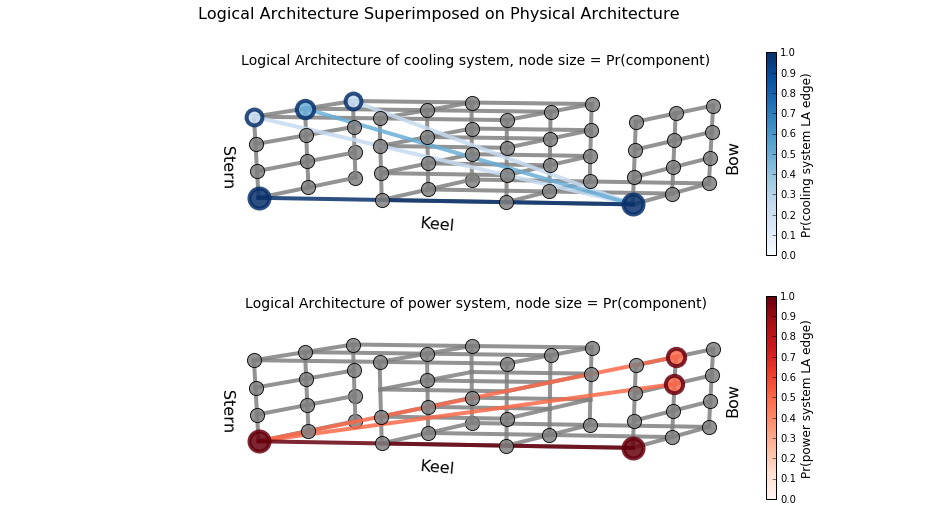

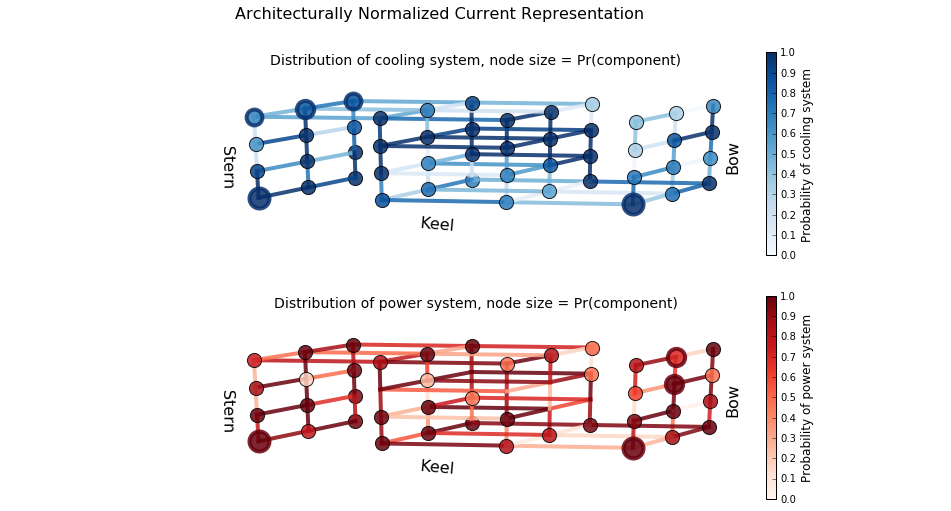

In [17]:
g=nx.grid_graph(dim=[4,3,4])
# print g.nodes()

#Constriction
# g.remove_nodes_from([(2,0,0),(2,1,0),(2,2,0),(2,0,3),(2,1,3),(2,2,3),(2,0,1),(2,0,2),(2,2,1),(2,2,2)])

#Bulkhead
#Up from keel
g.remove_edges_from([((0,0,0),(1,0,0)),((0,1,0),(1,1,0)),((0,2,0),(1,2,0)),
                    ((0,0,1),(1,0,1)),((0,1,1),(1,1,1)),((0,2,1),(1,2,1)),
                    ((0,0,2),(1,0,2)),((0,1,2),(1,1,2)),((0,2,2),(1,2,2))])

#Down from deck
g.remove_edges_from([((2,0,3),(3,0,3)),((2,1,3),(3,1,3)),((2,2,3),(3,2,3)),
                    ((2,0,1),(3,0,1)),((2,1,1),(3,1,1)),((2,2,1),(3,2,1)),
                    ((2,0,2),(3,0,2)),((2,1,2),(3,1,2)),((2,2,2),(3,2,2))])


#Define Logical Architecture
gen_loc={(0,0,0):1.0}
chill_loc={(3,0,0):1.0}
c_1_loc={(3,1,3):0.5, (3,1,2):0.5}
c_2_loc={(0,0,3):0.25, (0,1,3):0.5, (0,2,3):0.25}

p=nx.Graph()
p.add_node('chill',loc=chill_loc)
p.add_node('gen',loc=gen_loc)
p.add_node('c_1',loc=c_1_loc)
# p.add_node('c_2',loc=c_2_loc)
p.add_edge('gen','c_1')
# p.add_edge('gen','c_2')
p.add_edge('gen','chill')
# print p.nodes(data=True)

c=nx.Graph()
c.add_node('gen',loc=gen_loc)
c.add_node('chill',loc=chill_loc)
# c.add_node('c_1',loc=c_1_loc)
c.add_node('c_2',loc=c_2_loc)
# c.add_edge('chill','c_1')
c.add_edge('chill','c_2')
c.add_edge('chill','gen')

LA={'power':p,'cooling':c}

#ANCR
#Create ANCR
start=time.time()
I=make_current_dict(g)
# print I.keys()
# for s in I:
#     for t in I[s]:
#         print s,t,I[s][t]

#ANCR distribution
LA_I=current_distribution(LA,I,g)
# for sys,net in LA_I.iteritems():
#     print sys
#     for i,j,d in net.edges(data=True):
#         print i,j,d

#ANCR distribution conversion
g_current=project_current_distribution(LA_I,g)
end=time.time()
print (end-start)

# print g_current.edges(data=True)

#visualize current distribution
plot_setup(g_current,LA_I)
plot_current(g_current, LA_I)


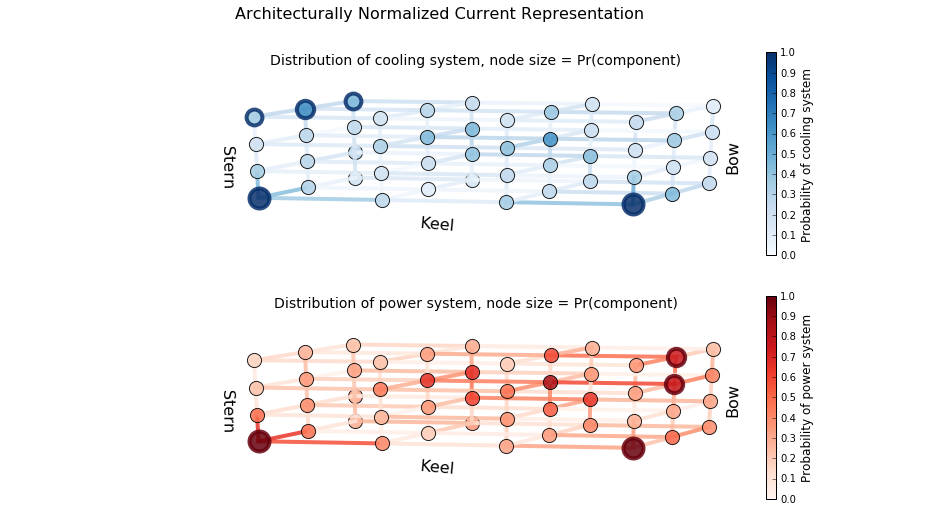

In [343]:
plot_current(g_current, LA_I,cutoff=.0)

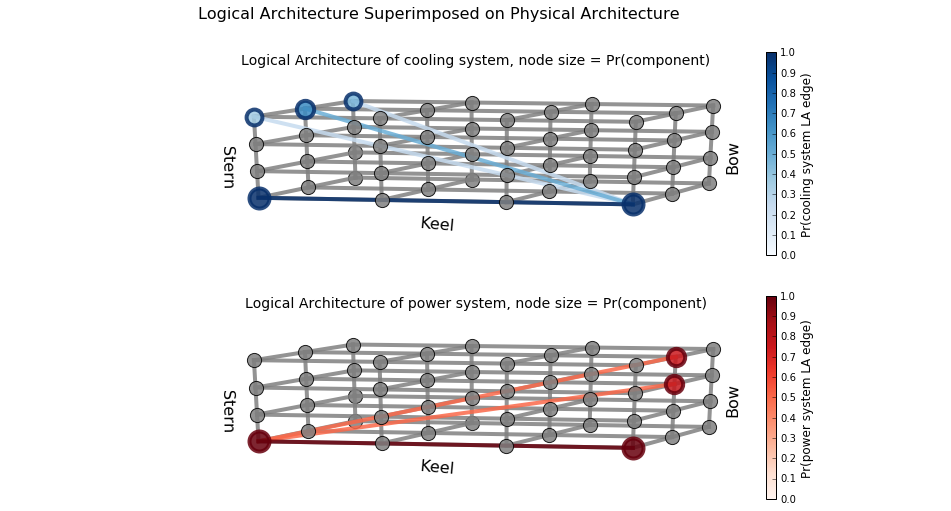

In [348]:
plot_setup(g_current,LA_I)

In [9]:
#timing test
g=nx.grid_graph(dim=[10,10,1])
start=time.time()
I=make_current_dict(g)

end=time.time()
print (end-start)

KeyboardInterrupt: 

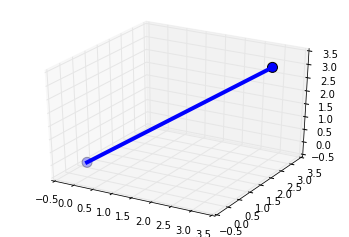

In [108]:
#draw 3d experiments

xs=[0,3]
ys=[0,3]
zs=[0,3]

#size
s=100
ls=4

#draw 3d scatter and line
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs,s=s)
ax.plot(xs,ys,zs,linewidth=ls)


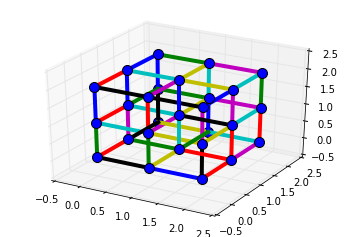

In [115]:
#draw 3d network experiments
g=nx.grid_graph(dim=[3,3,3])
#print g.nodes()

#size
s=100
ls=4

#make figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#draw 3d scatter
for n in g.nodes():
    ax.scatter(xs=n[0], ys=n[1], zs=n[2], s=s)
    
#draw 3d line
for i,j in g.edges():
    ax.plot(xs=[i[0],j[0]],ys=[i[1],j[1]],zs=[i[2],j[2]],linewidth=ls)
    


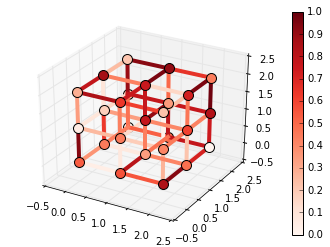

In [160]:
#draw 3d network experiments, color matrix
g=nx.grid_graph(dim=[3,3,3])

# m.set_array(z)

cmap=plt.cm.get_cmap('Reds')

for n in g.nodes():
    g.node[n]['c']=random.uniform(0, 1)

for i,j in g.edges():
    g.edge[i][j]['c']=random.uniform(0, 1)

#size
s=100
ls=4

#values
vals=[0.0,1.0]


#make figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#draw 3d scatter
for n in g.nodes():
    ax.scatter(xs=n[0],ys=n[1],zs=n[2],s=s,c=cmap(g.node[n]['c']))
    vals.append(g.node[n]['c'])
    
#draw 3d line
for i,j in g.edges():
    ax.plot(xs=[i[0],j[0]], ys=[i[1],j[1]], zs=[i[2],j[2]], linewidth=ls, c=cmap(g.edge[i][j]['c']))
    vals.append(g.edge[i][j]['c'])

# #draw 3d scatter
# xs=[]
# ys=[]
# zs=[]
# cs=[]
# for n in g.nodes():
#     xs.append(n[0])
#     ys.append(n[1])
#     zs.append(n[2])
#     cs.append(cmap(g.node[n]['c']))
    
# p=ax.scatter(xs=xs, ys=ys, zs=zs, s=s, c=cs)

m=plt.cm.ScalarMappable(cmap='Reds')
m.set_array(vals)
    
plt.colorbar(m)

In [11]:
import itertools
import networkx as nx
from networkx.algorithms.centrality.flow_matrix import *

In [32]:
def current_flow_betweenness_centrality_subset(G,sources,targets,
                                               normalized=False,
                                               weight='weight',
                                               dtype=float, solver='lu'):
    r"""Compute current-flow betweenness centrality for subsets of nodes.

    Current-flow betweenness centrality uses an electrical current
    model for information spreading in contrast to betweenness
    centrality which uses shortest paths.

    Current-flow betweenness centrality is also known as
    random-walk betweenness centrality [2]_.

    Parameters
    ----------
    G : graph
      A NetworkX graph 

    sources: list of nodes
      Nodes to use as sources for current

    targets: list of nodes
      Nodes to use as sinks for current

    normalized : bool, optional (default=True)
      If True the betweenness values are normalized by b=b/(n-1)(n-2) where
      n is the number of nodes in G.

    weight : string or None, optional (default='weight')
      Key for edge data used as the edge weight.
      If None, then use 1 as each edge weight.

    dtype: data type (float)
      Default data type for internal matrices.
      Set to np.float32 for lower memory consumption.

    solver: string (default='lu')
       Type of linear solver to use for computing the flow matrix.
       Options are "full" (uses most memory), "lu" (recommended), and 
       "cg" (uses least memory).

    Returns
    -------
    nodes : dictionary
       Dictionary of nodes with betweenness centrality as the value.
        
    See Also
    --------
    approximate_current_flow_betweenness_centrality
    betweenness_centrality
    edge_betweenness_centrality
    edge_current_flow_betweenness_centrality

    Notes
    -----
    Current-flow betweenness can be computed in `O(I(n-1)+mn \log n)`
    time [1]_, where `I(n-1)` is the time needed to compute the 
    inverse Laplacian.  For a full matrix this is `O(n^3)` but using
    sparse methods you can achieve `O(nm{\sqrt k})` where `k` is the
    Laplacian matrix condition number.  

    The space required is `O(nw) where `w` is the width of the sparse
    Laplacian matrix.  Worse case is `w=n` for `O(n^2)`.

    If the edges have a 'weight' attribute they will be used as 
    weights in this algorithm.  Unspecified weights are set to 1.

    References
    ----------
    .. [1] Centrality Measures Based on Current Flow. 
       Ulrik Brandes and Daniel Fleischer,
       Proc. 22nd Symp. Theoretical Aspects of Computer Science (STACS '05). 
       LNCS 3404, pp. 533-544. Springer-Verlag, 2005. 
       http://www.inf.uni-konstanz.de/algo/publications/bf-cmbcf-05.pdf

    .. [2] A measure of betweenness centrality based on random walks,
       M. E. J. Newman, Social Networks 27, 39-54 (2005).
    """
    from networkx.utils import reverse_cuthill_mckee_ordering 
    try:
        import numpy as np
    except ImportError:
        raise ImportError('current_flow_betweenness_centrality requires NumPy ',
                          'http://scipy.org/')
    try:
        import scipy 
    except ImportError:
        raise ImportError('current_flow_betweenness_centrality requires SciPy ',
                          'http://scipy.org/')
    if G.is_directed():
        raise nx.NetworkXError('current_flow_betweenness_centrality() ',
                               'not defined for digraphs.')
    if not nx.is_connected(G):
        raise nx.NetworkXError("Graph not connected.")
    n = G.number_of_nodes()
    ordering = list(reverse_cuthill_mckee_ordering(G))
    # make a copy with integer labels according to rcm ordering
    # this could be done without a copy if we really wanted to
    mapping=dict(zip(ordering,range(n)))
#     print mapping
    H = nx.relabel_nodes(G,mapping)
    betweenness = dict.fromkeys(H,0.0) # b[v]=0 for v in H
    for row,(s,t) in flow_matrix_row(H, weight=weight, dtype=dtype, 
                                     solver=solver):
#         print row, (s,t)
        for ss in sources:
            i=mapping[ss]
            for tt in targets:
                j=mapping[tt]
                betweenness[s]+=0.5*np.abs(row[i]-row[j]) 
                betweenness[t]+=0.5*np.abs(row[i]-row[j]) 
    if normalized:
        nb=(n-1.0)*(n-2.0) # normalization factor
    else:
        nb=2.0
    for v in H:
        betweenness[v]=betweenness[v]#/nb#+1.0/(2-n)
    betweenness[mapping[sources[0]]]=1.0
    betweenness[mapping[targets[0]]]=1.0
    return dict((ordering[k],v) for k,v in betweenness.items())


In [29]:
print current_flow_betweenness_centrality_subset(g,[1],[5])

{1: 0, 2: 2, 3: 1, 4: 3, 5: 4}
[ 0.   -0.75 -0.25 -0.5  -0.5 ] (0, 1)
[ 0.   -0.25 -0.75 -0.5  -0.5 ] (0, 2)
[ 0.    0.25 -0.25 -0.5  -0.5 ] (1, 3)
[ 0.   -0.25  0.25 -0.5  -0.5 ] (2, 3)
[ 0.  0.  0.  0. -1.] (3, 4)
{1: 1.0, 2: 0.5, 3: 0.5, 4: 1.0, 5: 1.0}


In [18]:
src={1:1.0}
snk={2:1.0}

I=make_current_dict(g)
elements=g.nodes()
p_r=dict.fromkeys(g.nodes()+g.edges(),0.0)
#p_r=dict.fromkeys(g.nodes(),0.0)
#print p_r

for s,belief_s in src.iteritems():
    for t,belief_t in snk.iteritems():
        for n in p_r:
            #print s,t,n
            p_n=belief_s*belief_t*I[s][t][n]
            #print p_n
            p_r[n]+=p_n
            
print p_r

{(1, 2): 0.75, 1: 1.0, 2: 1.0, 3: 0.25, 4: 0.25, 5: 0.0, (4, 5): 0.0, (1, 3): 0.25, (3, 4): 0.25, (2, 4): 0.25}


In [38]:
gb=nx.grid_graph(dim=[5,5,5])
s=(0,0,0)
t=(4,4,4)
I=current_st(gb,s,t)


for n, p in I.iteritems():
    if p>1.0:
        print n,p
    if n in gb.neighbors(s):
        print n,p


(0, 1, 0) 0.333333333333
(0, 0, 1) 0.333333333333
(1, 0, 0) 0.333333333333


In [42]:
def current_st(G,ss,tt,normalized=False,weight='weight',dtype=float, solver='lu'):
    r"""Compute current-flow betweenness centrality for subsets of nodes.

    Current-flow betweenness centrality uses an electrical current
    model for information spreading in contrast to betweenness
    centrality which uses shortest paths.

    Current-flow betweenness centrality is also known as
    random-walk betweenness centrality [2]_.

    Parameters
    """
    from networkx.utils import reverse_cuthill_mckee_ordering 
    try:
        import numpy as np
    except ImportError:
        raise ImportError('current_flow_betweenness_centrality requires NumPy ',
                          'http://scipy.org/')
    try:
        import scipy 
    except ImportError:
        raise ImportError('current_flow_betweenness_centrality requires SciPy ',
                          'http://scipy.org/')
    if G.is_directed():
        raise nx.NetworkXError('current_flow_betweenness_centrality() ',
                               'not defined for digraphs.')
    if not nx.is_connected(G):
        raise nx.NetworkXError("Graph not connected.")
    n = G.number_of_nodes()
    ordering = list(reverse_cuthill_mckee_ordering(G))
    # make a copy with integer labels according to rcm ordering
    # this could be done without a copy if we really wanted to
    mapping=dict(zip(ordering,range(n)))
#     print mapping
    H = nx.relabel_nodes(G,mapping)
    betweenness = dict.fromkeys(H.nodes()+H.edges(),0.0) # b[v]=0 for v in H
    for row,(s,t) in flow_matrix_row(H, weight=weight, dtype=dtype, 
                                     solver=solver):
#         print row, (s,t)
        
        i=mapping[ss]
        j=mapping[tt]
        betweenness[s]+=0.5*np.abs(row[i]-row[j]) 
        betweenness[t]+=0.5*np.abs(row[i]-row[j])
        betweenness[(s,t)]+=np.abs(row[i]-row[j])
    if normalized:
        nb=(n-1.0)*(n-2.0) # normalization factor
    else:
        nb=2.0
    for v in H:
        betweenness[v]=betweenness[v]#/nb#+1.0/(2-n)
    betweenness[mapping[ss]]=1.0
    betweenness[mapping[tt]]=1.0
    I={}
    for k,v in betweenness.items():
        if k in H.nodes():
            I[ordering[k]]=v
        else:
            e=(ordering[k[0]],ordering[k[1]])
            I[e]=v
        
#     return dict((ordering[k],v) for k,v in betweenness.items())
    return I

In [44]:
print current_st(g,1,2)

{(1, 2): 0.75, 1: 1.0, 2: 1.0, 3: 0.25, 4: 0.25, 5: 0.0, (4, 5): 0.0, (1, 3): 0.25, (3, 4): 0.25, (2, 4): 0.25}


In [49]:
gt=nx.grid_graph(dim=[4,3,4])

#Bulkhead
#Up from keel
gt.remove_edges_from([((0,0,0),(1,0,0)),((0,1,0),(1,1,0)),((0,2,0),(1,2,0)),
                    ((0,0,1),(1,0,1)),((0,1,1),(1,1,1)),((0,2,1),(1,2,1)),
                    ((0,0,2),(1,0,2)),((0,1,2),(1,1,2)),((0,2,2),(1,2,2))])
# g.remove_edges_from([((0,0,0),(1,0,0)),((0,1,0),(1,1,0)),((0,2,0),(1,2,0))])
# g.remove_edges_from([((0,0,0),(1,0,0)),((0,1,0),(1,1,0))])

print gt.neighbors((0,0,0))
s=(0,0,0)
t=(3,0,0)
I=current_st(gt,s,t)
# print I
for e,p in I.iteritems():
    if p>1.0:
        print e, p
    if e in gt.neighbors((0,0,0)):
        print e,p

[(0, 1, 0), (0, 0, 1)]
(0, 1, 0) 0.440714308665
(0, 0, 1) 0.559285691335
